###  DNA Sequence Classification using Machine Learning Techniques

In [17]:
import pandas as pd
import numpy as np
import Bio
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [6]:
humandata = pd.read_table('human_data.txt')
humandata.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [7]:
humandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


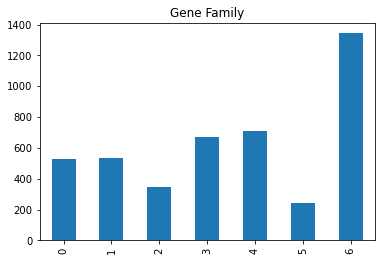

In [15]:
## 4380 Sequences are there
humandata['class'].value_counts().sort_index().plot.bar()
plt.title("Gene Family")
plt.show()

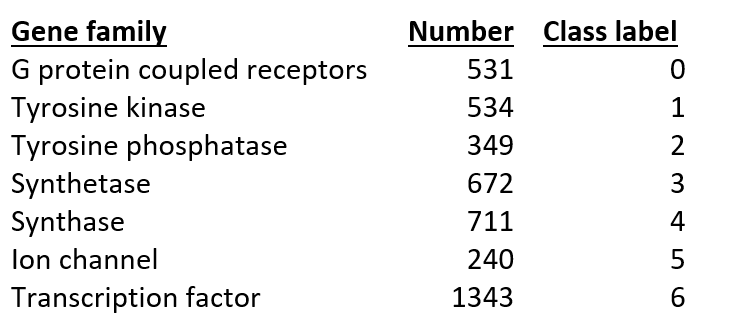

In [18]:
Image('_results_.png')

In [19]:
# The Data is somewhat Skewed  but Still lets proceed with Normal Techniques and if they are not working well 
#lets do sampling Technique like Oversampling ,UnderSampling ,SMOTE

In [35]:
display(humandata["sequence"][0])

print(f'length of Sequence 1 : {len(humandata["sequence"][0])}')

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

length of Sequence 1 : 207


In [23]:
from Bio.Seq import Seq
my_seq = Seq(humandata["sequence"][0])
print(my_seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [28]:
print(f" Complement : {my_seq.complement()} \n")
print(f"Reverse Complement :  {my_seq.reverse_complement()} " )

 Complement : TACGGGGTTGATTTATGATGGCATACCGGGTGGTATTAATGGGGGTATGAGGAATGTGATAAGGAGTAGTGGGTTGATTTTTATAATTTGTGTTTGATGGTGGATGGAGGGAGTGGTTTCGGGTATTTTTATTTTTTAATATTGTTTGGGACTCTTGGTTTTACTTGCTTTTAGACAAGCGAAGTAAGTAACGGGGGTGTTAGGATC 

Reverse Complement :  CTAGGATTGTGGGGGCAATGAATGAAGCGAACAGATTTTCGTTCATTTTGGTTCTCAGGGTTTGTTATAATTTTTTATTTTTATGGGCTTTGGTGAGGGAGGTAGGTGGTAGTTTGTGTTTAATATTTTTAGTTGGGTGATGAGGAATAGTGTAAGGAGTATGGGGGTAATTATGGTGGGCCATACGGTAGTATTTAGTTGGGGCAT 


In [32]:
#The GC Content of a DNA sequence is important and relates to how stable the molecule will be

print("GC%:\t\t" + str(100 * float((my_seq.count("G") + my_seq.count("C")) / len(my_seq) ) ))


from Bio.SeqUtils import GC
print("GC% Package:\t" + str(GC(my_seq)))

GC%:		39.61352657004831
GC% Package:	39.61352657004831


In [36]:
humandata["length"] = humandata.sequence.apply(lambda x : len(x))

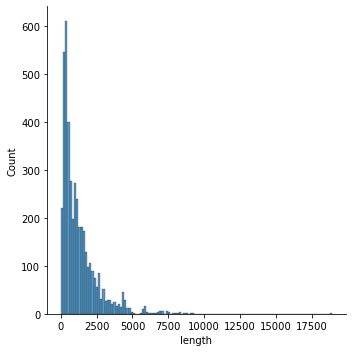

In [38]:
sns.displot(humandata["length"])

Length of the Sequence varies alot .we have to find a way to make a standard count so that we can use ML Techniques

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In genomics, we refer to these types of manipulations as "**k-mer counting**", or counting the occurances of each possible k-mer sequence.

In [40]:

def getKmers(sequence, size=6):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [42]:
#Now we can convert our training data sequences into short overlapping k-mers of legth 6.

humandata['words'] = humandata.apply(lambda x: getKmers(x['sequence']), axis=1)

In [43]:
humandata.head()

,sequence,class,length,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC..."


In [44]:
#Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert 
#the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.

In [45]:
#We are now going to Convert the words into string and then apply Count Vectorizer

humandata["in_string"] =humandata["words"].apply(lambda x:  ' '.join(x))

In [51]:
humandata[["words","in_string"]]

,words,in_string
0,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...",ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...",ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...",ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...
...,...,...
4375,"[ATGGAA, TGGAAG, GGAAGA, GAAGAT, AAGATT, AGATT...",ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...
4376,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4377,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4378,"[ATGGGG, TGGGGC, GGGGCA, GGGCAC, GGCACC, GCACC...",ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...


In [52]:
y=humandata.loc[:,'class'].values

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(humandata["in_string"])

In [55]:
print(X.shape)

(4380, 232414)


In [59]:
## This is ngram
cv.vocabulary_

{'atgccc tgcccc gcccca ccccaa': 52803,
 'tgcccc gcccca ccccaa cccaac': 207969,
 'gcccca ccccaa cccaac ccaact': 136621,
 'ccccaa cccaac ccaact caacta': 79202,
 'cccaac ccaact caacta aactaa': 78295,
 'ccaact caacta aactaa actaaa': 74681,
 'caacta aactaa actaaa ctaaat': 60650,
 'aactaa actaaa ctaaat taaata': 6563,
 'actaaa ctaaat taaata aaatac': 25724,
 'ctaaat taaata aaatac aatact': 101750,
 'taaata aaatac aatact atacta': 176196,
 'aaatac aatact atacta tactac': 3017,
 'aatact atacta tactac actacc': 11772,
 'atacta tactac actacc ctaccg': 46030,
 'tactac actacc ctaccg taccgt': 181326,
 'actacc ctaccg taccgt accgta': 25976,
 'ctaccg taccgt accgta ccgtat': 102780,
 'taccgt accgta ccgtat cgtatg': 180265,
 'accgta ccgtat cgtatg gtatgg': 21456,
 'ccgtat cgtatg gtatgg tatggc': 84717,
 'cgtatg gtatgg tatggc atggcc': 99209,
 'gtatgg tatggc atggcc tggccc': 163924,
 'tatggc atggcc tggccc ggccca': 187178,
 'atggcc tggccc ggccca gcccac': 53731,
 'tggccc ggccca gcccac cccacc': 211749,
 'ggccca gcccac c

In [112]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [114]:
print("Decision Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    dt =DecisionTreeClassifier()
    dt.fit(X[train_index],y[train_index])
    pred=dt.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Decision Classifier :
0 Iteration : Accuracy = 0.80251     F1_Score = 0.80891
1 Iteration : Accuracy = 0.82648     F1_Score = 0.82889
2 Iteration : Accuracy = 0.81507     F1_Score = 0.81874
3 Iteration : Accuracy = 0.81507     F1_Score = 0.82027
4 Iteration : Accuracy = 0.79224     F1_Score = 0.79624


In [110]:
print("Random Forest Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Classifier :
0 Iteration : Accuracy = 0.903  F1_Score = 0.905
1 Iteration : Accuracy = 0.920  F1_Score = 0.920
2 Iteration : Accuracy = 0.894  F1_Score = 0.898
3 Iteration : Accuracy = 0.914  F1_Score = 0.915
4 Iteration : Accuracy = 0.908  F1_Score = 0.910


In [125]:
## Used Grid Search to find the best Hyperparameters. 
print("Naive Bayes Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier :
0 Iteration : Accuracy = 0.98059    F1_Score = 0.98061
1 Iteration : Accuracy = 0.98059    F1_Score = 0.98066
2 Iteration : Accuracy = 0.97603    F1_Score = 0.97606
3 Iteration : Accuracy = 0.97717    F1_Score = 0.97722
4 Iteration : Accuracy = 0.97717    F1_Score = 0.97715


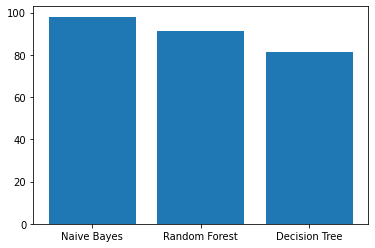

In [124]:
scores ={"Naive Bayes":98.059  ,"Random Forest":91.4 ,"Decision Tree": 81.5}

plt.bar(range(len(scores)), list(scores.values()), align='center')
plt.xticks(range(len(scores)), list(scores.keys()))
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state=42)
nb_ =MultinomialNB(alpha=0.01)
nb_.fit(X_train, y_train)

y_pred = nb_.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    0   0    3
1           0  100   0    0    0   0    6
2           0    0  78    0    0   0    0
3           0    0   0  122    0   0    3
4           0    0   0    0  143   0    6
5           0    0   0    0    0  51    0
6           0    0   0    0    0   0  265


In [135]:
import pickle

In [136]:
filename = 'finalized_model.sav'
pickle.dump(nb_, open(filename, 'wb'))

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

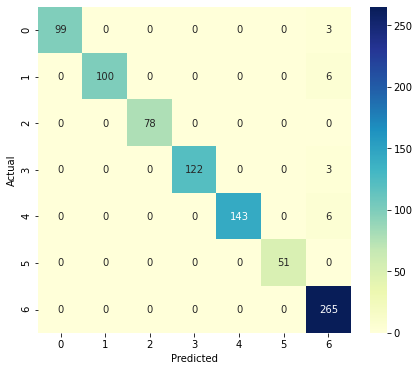

In [134]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')

##### Using TFIDF Vectorization

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(4,4))
X_tf = tf.fit_transform(humandata["in_string"])

In [120]:
tf.vocabulary_

{'atgccc tgcccc gcccca ccccaa': 52803,
 'tgcccc gcccca ccccaa cccaac': 207969,
 'gcccca ccccaa cccaac ccaact': 136621,
 'ccccaa cccaac ccaact caacta': 79202,
 'cccaac ccaact caacta aactaa': 78295,
 'ccaact caacta aactaa actaaa': 74681,
 'caacta aactaa actaaa ctaaat': 60650,
 'aactaa actaaa ctaaat taaata': 6563,
 'actaaa ctaaat taaata aaatac': 25724,
 'ctaaat taaata aaatac aatact': 101750,
 'taaata aaatac aatact atacta': 176196,
 'aaatac aatact atacta tactac': 3017,
 'aatact atacta tactac actacc': 11772,
 'atacta tactac actacc ctaccg': 46030,
 'tactac actacc ctaccg taccgt': 181326,
 'actacc ctaccg taccgt accgta': 25976,
 'ctaccg taccgt accgta ccgtat': 102780,
 'taccgt accgta ccgtat cgtatg': 180265,
 'accgta ccgtat cgtatg gtatgg': 21456,
 'ccgtat cgtatg gtatgg tatggc': 84717,
 'cgtatg gtatgg tatggc atggcc': 99209,
 'gtatgg tatggc atggcc tggccc': 163924,
 'tatggc atggcc tggccc ggccca': 187178,
 'atggcc tggccc ggccca gcccac': 53731,
 'tggccc ggccca gcccac cccacc': 211749,
 'ggccca gcccac c

In [118]:
tf.idf_

array([5.49321199, 6.05282778, 5.15092578, ..., 6.74597496, 6.74597496,
       6.98713702])

In [121]:
print("Naive Bayes Classifier for TFidf:")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X_tf,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier for TFidf:
0 Iteration : Accuracy = 0.98059    F1_Score = 0.98061
1 Iteration : Accuracy = 0.98059    F1_Score = 0.98066
2 Iteration : Accuracy = 0.97603    F1_Score = 0.97606
3 Iteration : Accuracy = 0.97717    F1_Score = 0.97722
4 Iteration : Accuracy = 0.97717    F1_Score = 0.97715


In [ ]:
print("Random Forest Classifier for Tfidf :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X_tf,y)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

### Testing our Model on  Chimpanzee data and Dog Data

In [138]:
chimp = pd.read_table('chimp_data.txt')
dog = pd.read_table('dog_data.txt')
chimp.head()
dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [139]:
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)

In [155]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 1].values                       # y_c for chimp

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 1].values        

In [142]:
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [143]:
print(X_chimp.shape)
print(X_dog.shape)

(1682, 232414)
(820, 232414)


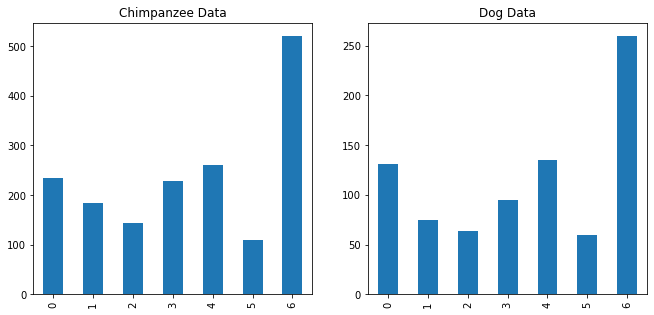

In [150]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
chimp['class'].value_counts().sort_index().plot.bar()
plt.title("Chimpanzee Data");
plt.subplot(1,2,2)
dog['class'].value_counts().sort_index().plot.bar()
plt.title("Dog Data");

In [151]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = nb_.predict(X_chimp)
y_pred_dog = nb_.predict(X_dog)

In [157]:
# performance on chimp genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          231    0    0    0    0    0    3
1            0  179    0    0    0    0    6
2            0    0  144    0    0    0    0
3            0    0    0  225    0    0    3
4            1    0    0    0  253    0    7
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.988 
precision = 0.989 
recall = 0.988 
f1 = 0.988


In [158]:
# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          124   0   0   0    0   0    7
1            0  52   0   0    0   0   23
2            0   0  43   0    0   0   21
3            1   0   0  64    1   0   29
4            0   0   0   0  110   0   25
5            0   0   0   0    0  40   20
6            0   0   0   0    0   0  260
accuracy = 0.845 
precision = 0.894 
recall = 0.845 
f1 = 0.847


### The model seems to perform well on human data. It also does on Chimpanzee. That might not be a surprize since the chimp and human are so similar genetically. The performance on dog is not quite as good. We would expect this since the dog is more divergent from human than the chimpanze.